<a href="https://colab.research.google.com/github/shivam-daksh/solar-panel-fault-detection/blob/main/Solar_Panel_Fault_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

In [6]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.2.1+cu121 CPU


In [ ]:
!pip install object_detection

In [ ]:
# !kill -9 -1

In [ ]:
import os
import json
import cv2
import shutil
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import label_map_util

# Replace with paths to your data and pre-trained model
data_dir = "..."
model_name = "..."  # Name of pre-trained model (e.g., 'ssd_mobilenet_v2')


ImportError: cannot import name 'string_int_label_map_pb2' from 'object_detection.protos' (/usr/local/lib/python3.10/dist-packages/object_detection/protos/__init__.py)

In [ ]:
shutil.copytree("/content/drive/MyDrive/AI ML DATA/solar/archive (3)/dataset_2/","/content/data")

'/content/data'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to pre-trained model (.pb) file
model_path = os.path.join(data_dir, 'models', model_name, 'frozen_inference_graph.pb')

# Load the model
detection_model = tf.saved_model.load(model_path)

# Path to label map (.pbtxt) file
category_index = label_map_util.create_category_index_from_labelmap(
    os.path.join(data_dir, 'annotations', 'label_map.pbtxt'))


In [ ]:
def run_inference_on_image(image):
  # Preprocess image for model input
  image = np.expand_dims(image, axis=0)
  image = np.uint8(255.0 * image)

  # Run model inference
  input_tensor = tf.convert_to_tensor(image)
  detections = detection_model(input_tensor)

  # Extract relevant outputs (boxes, scores, classes)
  num_detections = int(detections['num_detections'][0])
  detection_boxes = detections['detection_boxes'][0][:num_detections]
  detection_scores = detections['detection_scores'][0][:num_detections]
  detection_classes = np.array(detections['detection_classes'][0][:num_detections], dtype=np.uint8) + 1

  return detection_boxes, detection_scores, detection_classes


In [ ]:
# Load your image
image = ...

# Run inference
boxes, scores, classes = run_inference_on_image(image)

# Visualize detections (optional)
vis_util.visualize_boxes_and_labels_on_image_array(
    image, boxes, classes, scores, category_index,
    instance_mask=None,
    use_normalized_coordinates=True,
    line_thickness=8)

# Display or save the image with detections
...


# YOLOV8 CODE


---



In [7]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov5


In [8]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/107.7 GB disk)


In [10]:
from ultralytics import YOLO

from IPython.display import display, Image

In [16]:
shutil.rmtree("/content/__MACOSX")

In [15]:
import zipfile

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/AI ML DATA/solar/data/data.zip'

# Destination directory to extract the files
extract_dir = '/content/'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of zip file into the specified directory
    zip_ref.extractall(extract_dir)

print("Extraction complete.")


Extraction complete.


In [31]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=/content/data/data.yaml epochs=20 imgsz=600

In [24]:
%cd {HOME}
imgurl = "/content/data/test/images/20170717_150451_jpg.rf.b2af1321ffe778cc4c642e354f5b84b9.jpg"
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source={imgurl} save=True

/content/yolov5
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 /content/data/test/images/20170717_150451_jpg.rf.b2af1321ffe778cc4c642e354f5b84b9.jpg: 640x640 1 toothbrush, 667.9ms
Speed: 20.3ms preprocess, 667.9ms inference, 18.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content/yolov5


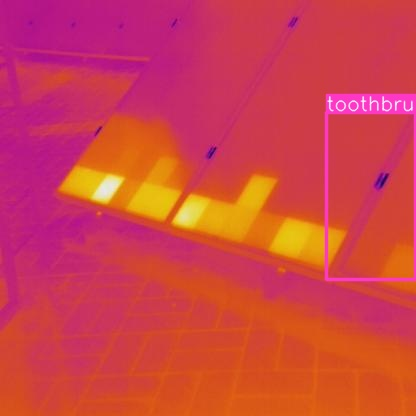

In [27]:
%cd {HOME}
Image(filename='runs/detect/predict3/20170717_150451_jpg.rf.b2af1321ffe778cc4c642e354f5b84b9.jpg', height=600)
# /content/yolov5/runs/detect/predict2/20170710_145114_jpg.rf.dddf919c3e547e6bff4170067ed771f3.jpg
# /content/yolov5/runs/detect/predict3/20170717_150451_jpg.rf.b2af1321ffe778cc4c642e354f5b84b9.jpg

In [28]:
tensorboard --logdir runs/detect/train2

SyntaxError: invalid syntax (<ipython-input-28-067b92719ddc>, line 1)